## Importing libraries and Data Reading

In [2]:

from sklearn.metrics import f1_score, confusion_matrix,accuracy_score

def eval(y_pred,y_test):
    cm=confusion_matrix(y_test,y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    
    FPR = FP/ (FP + TN)
    acc=accuracy_score(y_test,y_pred)
    print(cm)
    print('False Positive Rate', FPR)
    print('Accuracy', acc)


In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
import warnings
warnings.filterwarnings('ignore')

In [4]:
from ucimlrepo import fetch_ucirepo 
  

default_of_credit_card_clients = fetch_ucirepo(id=350) 
  
X = default_of_credit_card_clients.data.features 
y = default_of_credit_card_clients.data.targets 

In [5]:
X.columns=descriptions = [
    "Credit limit",
    "Gender",
    "Education level",
    "Marital status",
    "Age",
    "Repayment status in September",
    "Repayment status in August",
    "Repayment status in July",
    "Repayment status in June",
    "Repayment status in May",
    "Repayment status in April",
    "Bill amount in September",
    "Bill amount in August",
    "Bill amount in July",
    "Bill amount in June",
    "Bill amount in May",
    "Bill amount in April",
    "Amount paid in September",
    "Amount paid in August",
    "Amount paid in July",
    "Amount paid in June",
    "Amount paid in May",
    "Amount paid in April"
]


In [6]:

X['Gender']=X['Gender']-1

In [7]:
X.head()

,Credit limit,Gender,Education level,Marital status,Age,Repayment status in September,Repayment status in August,Repayment status in July,Repayment status in June,Repayment status in May,...,Bill amount in July,Bill amount in June,Bill amount in May,Bill amount in April,Amount paid in September,Amount paid in August,Amount paid in July,Amount paid in June,Amount paid in May,Amount paid in April
0,20000,1,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,1,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,1,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,1,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,0,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [8]:
X.isnull().sum()

Credit limit                     0
Gender                           0
Education level                  0
Marital status                   0
Age                              0
Repayment status in September    0
Repayment status in August       0
Repayment status in July         0
Repayment status in June         0
Repayment status in May          0
Repayment status in April        0
Bill amount in September         0
Bill amount in August            0
Bill amount in July              0
Bill amount in June              0
Bill amount in May               0
Bill amount in April             0
Amount paid in September         0
Amount paid in August            0
Amount paid in July              0
Amount paid in June              0
Amount paid in May               0
Amount paid in April             0
dtype: int64

In [9]:

def map_age(x):
    if x<40:
        return 1
    elif x<60:
        return 2
    else:
        return 3

In [10]:

X['Age'] = X['Age'].map(map_age)


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Credit limit                   30000 non-null  int64
 1   Gender                         30000 non-null  int64
 2   Education level                30000 non-null  int64
 3   Marital status                 30000 non-null  int64
 4   Age                            30000 non-null  int64
 5   Repayment status in September  30000 non-null  int64
 6   Repayment status in August     30000 non-null  int64
 7   Repayment status in July       30000 non-null  int64
 8   Repayment status in June       30000 non-null  int64
 9   Repayment status in May        30000 non-null  int64
 10  Repayment status in April      30000 non-null  int64
 11  Bill amount in September       30000 non-null  int64
 12  Bill amount in August          30000 non-null  int64
 13  Bill amount in J

# Exploratory Data Analysis

In [12]:
df=X.copy()
df['y']=y

df['y']=df['y'].map({1:'Default',0:'Non-Default'})
df['Gender']=df['Gender'].map({1:'Female',0:'Male'})
df['Education level']=df['Education level'].map({1:'graduate school',2:'university',3:'high school',4:'others'})

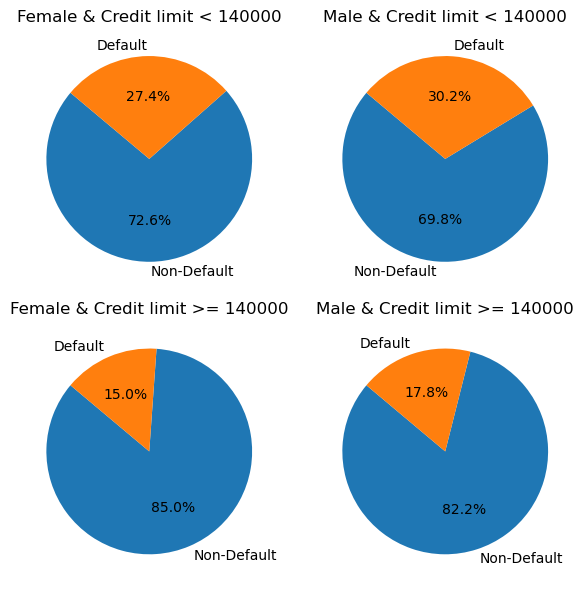

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(6,6))

labels = ['Non-Default', 'Default']
start_angle = 140

# Plot for Female and Credit limit < 140000
axs[0, 0].pie(df[(df['Gender'] == 'Female') & (df['Credit limit'] < 140000)]['y'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=start_angle)
axs[0, 0].set_title('Female & Credit limit < 140000')

# Plot for Male and Credit limit < 140000
axs[0, 1].pie(df[(df['Gender'] == 'Male') & (df['Credit limit'] < 140000)]['y'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=start_angle)
axs[0, 1].set_title('Male & Credit limit < 140000')

# Plot for Female and Credit limit >= 140000
axs[1, 0].pie(df[(df['Gender'] == 'Female') & (df['Credit limit'] >= 140000)]['y'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=start_angle)
axs[1, 0].set_title('Female & Credit limit >= 140000')

# Plot for Male and Credit limit >= 140000
axs[1, 1].pie(df[(df['Gender'] == 'Male') & (df['Credit limit'] >= 140000)]['y'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=start_angle)
axs[1, 1].set_title('Male & Credit limit >= 140000')

plt.tight_layout()
plt.show()


<Axes: xlabel='y', ylabel='count'>

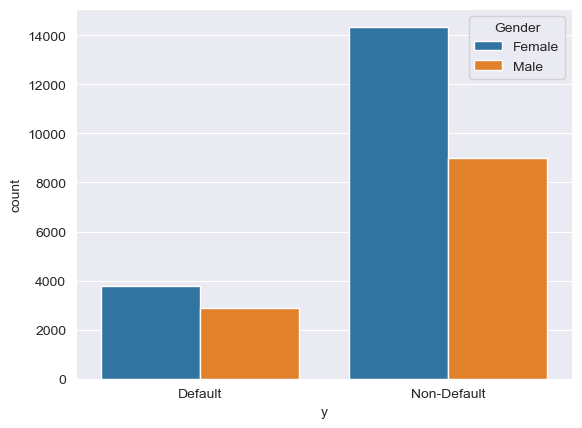

In [14]:
#count for default and non-default for each gender
import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(x='y', hue='Gender', data=df)

<Axes: xlabel='y', ylabel='count'>

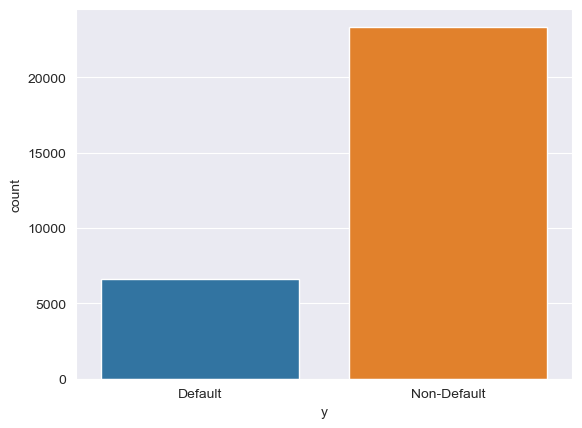

In [15]:
import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(x='y', data=df)

<Axes: xlabel='Gender', ylabel='count'>

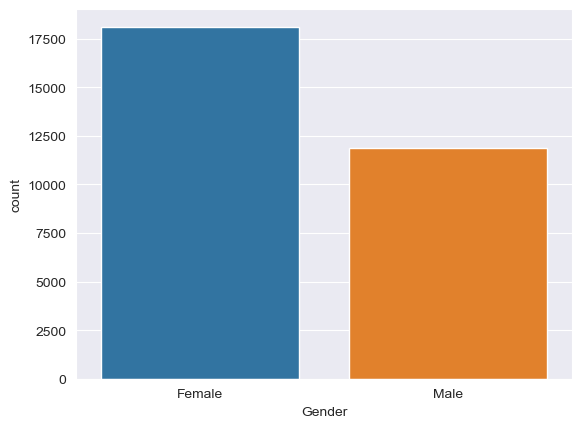

In [17]:
import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(x='Gender', data=df)

# Modelling

In [17]:
#splitting into train test with 20% test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
#function to find statiscal parity and equal opportunity

def stat_parity(preds, sens):

    #counter variable to count when sens is 1
    count_sensitive=0
    #counter variable to count when sens is 0
    count_not_sensitive=0
    #counter variable to count when sens is 1 and preds is also 1
    pred_1_sensitive=0
    #counter variable to count when sens is 0 and preds is 1
    pred_1_non_sensitive=0
    
    
    for i in range(len(preds)): #iterate through preds and sens
        if sens[i]==1:
            count_sensitive+=1 # if sens is 1 i.e it is a sensitive class increase counter
            if preds[i]==1:
                 pred_1_sensitive+=1 # if pred is 1 when sens is 1 increase counter
        elif sens[i]==0:
            count_not_sensitive+=1 # if sens is 0 i.e it is not a sensitive class increase counter
            if preds[i]==1:
                pred_1_non_sensitive+=1 # if pred is 1 when sens is 0 increase counter
    
    #stat_parity is always between 0 and 1. so I have checked if the denominator is 0. if it is 0 then stats parity for that factor should be lowest i.e 0
    if (count_sensitive==0):
        sens_ans=0 # if there is no sensitive class in data set sensitive class output to 0
    else:
        sens_ans=(pred_1_sensitive/count_sensitive) # else output for sensitive class P(ypred=1/A=1)
        
    if(count_not_sensitive)==0:
        not_sens_ans=0 # if there is no non sensitive class in data set non sensitive class output to 0
    else:
        not_sens_ans=(pred_1_non_sensitive/count_not_sensitive)# else output for non sensitive class P(ypred=1/A=0)
    
    return sens_ans-not_sens_ans # return difference


def eq_oppo(preds, sens, labels):

    #counter variable to count when sens is 1 and ytrue is 1
    count_sensitive=0
    #counter variable to count when sens is 0 and ytrue is 1
    count_not_sensitive=0
    #counter variable to count when sens is 1 and preds is also 1 and ytrue is also 1
    pred_1_sensitive=0
    #counter variable to count when sens is 0 and preds is also 1 and ytrue is also 1
    pred_1_non_sensitive=0
    
    for i in range(len(preds)): #iterate through preds and sens and labels
        if sens[i]==1 and labels[i]==1: 
            count_sensitive+=1 # if both sens=1 and ytrue=1 increase sensitive class counter
            if preds[i]==1:
                 pred_1_sensitive+=1 # if all three are 1 increase counter
        elif sens[i]==0 and labels[i]==1:
            count_not_sensitive+=1 # if class is not sensitive but ytrue=1 increase counter
            if preds[i]==1:
                pred_1_non_sensitive+=1 #if pred is 1, class!=sensitive and ytrue=1 increase counter

    #equal opportunity between 0 and 1. so I have checked if the denominator is 0. if it is 0 then equal opportunity for that factor should be lowest i.e 0
    if (count_sensitive==0):
        sens_ans=0 # if there is no sensitive class for which ytrue=1 in data set sensitive class output to 0
    else:
        sens_ans=(pred_1_sensitive/count_sensitive)# else output for sensitive class P(ypred=1/A=1, label=1)
        
    if(count_not_sensitive)==0:
        not_sens_ans=0 # if there is no non sensitive class for which ytrue=1 in data set non sensitive class output to 0
    else:
        not_sens_ans=(pred_1_non_sensitive/count_not_sensitive)# else output for non sensitive class P(ypred=1/A=0, label=1)
    return sens_ans-not_sens_ans #return difference

## 1. LightGBM

In [20]:
# building lightgbm model with binary classification
import lightgbm as lgb

params = {
    'objective': 'binary',
}

In [21]:



lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test)

model = lgb.train(params,
                  lgb_train,
                  valid_sets=[lgb_train, lgb_test])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5339, number of negative: 18661
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3210
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222458 -> initscore=-1.251397
[LightGBM] [Info] Start training from score -1.251397


In [22]:
#predicting on test with the best iteration model and converting the probabilities to 1 and 0
y_pred = list(model.predict(X_test, num_iteration=model.best_iteration))
y_pred=[1 if x>=0.5 else 0 for x in y_pred ]

In [23]:
#statistical parity
stat_parity(y_pred, np.array(X_test['Gender']))

-0.024521386418232025

In [24]:

#equal opportunity

eq_oppo(y_pred, np.array(X_test['Gender']), np.array(y_test))

-0.04888755024046293

In [66]:
# using the eval function to find the other metrics defined above
eval(y_pred,y_test)

[[4480  223]
 [ 815  482]]
False Positive Rate 0.04741654263236232
Accuracy 0.827


In [36]:
!pip3 install -U imbalanced-learn

## 2. SMOTE+LightGBM

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
#using smote to balance the data by oversampling
smote = SMOTE(random_state=0)


X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [40]:
y_train_smote.value_counts()

Y
0    18661
1    18661
Name: count, dtype: int64

In [41]:
# building train and test dataset for lightgbm and training the model on the train dataset
lgb_train = lgb.Dataset(X_train_smote, y_train_smote)
lgb_test = lgb.Dataset(X_test, y_test)

model_sm= lgb.train(params,
                  lgb_train,
                  valid_sets=[lgb_train, lgb_test])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18661, number of negative: 18661
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3395
[LightGBM] [Info] Number of data points in the train set: 37322, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [42]:
#predicting on test with the best iteration model and converting the probabilities to 1 and 0
y_pred_sm = list(model_sm.predict(X_test, num_iteration=model_sm.best_iteration))
y_pred_sm=[1 if x>=0.5 else 0 for x in y_pred_sm ]

In [43]:
#statistical parity
stat_parity(y_pred_sm, np.array(X_test['Gender']))

-0.129989367268063

In [44]:
#equal opportunity
eq_oppo(y_pred_sm, np.array(X_test['Gender']), np.array(y_test))

-0.13458272024332685

In [67]:
# using the eval function to find the other metrics defined above
eval(y_pred_sm,y_test)

[[4012  691]
 [ 656  641]]
False Positive Rate 0.14692749308951733
Accuracy 0.7755


## 3. BorderlineSMOTE + LightGBM

In [46]:
#another oversampling technique; borderline smote balances the data
from imblearn.over_sampling import BorderlineSMOTE
bs = BorderlineSMOTE(random_state=0)

X_train_bs, y_train_bs = bs.fit_resample(X_train, y_train)

In [47]:
y_train_bs.value_counts()

Y
0    18661
1    18661
Name: count, dtype: int64

In [48]:
# building train and test dataset for lightgbm and training the model on the train dataset

lgb_train = lgb.Dataset(X_train_bs, y_train_bs)
lgb_test = lgb.Dataset(X_test, y_test)

model_bs= lgb.train(params,
                  lgb_train,
                  valid_sets=[lgb_train, lgb_test])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18661, number of negative: 18661
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3394
[LightGBM] [Info] Number of data points in the train set: 37322, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [49]:
#predicting on test with the best iteration model and converting the probabilities to 1 and 0
y_pred_bs = list(model_bs.predict(X_test, num_iteration=model_bs.best_iteration))
y_pred_bs=[1 if x>=0.5 else 0 for x in y_pred_bs ]

In [50]:
#statistical parity
stat_parity(y_pred_bs, np.array(X_test['Gender']))

-0.13815659932603105

In [51]:
#equal opportunity
eq_oppo(y_pred_bs, np.array(X_test['Gender']), np.array(y_test))

-0.15201504991951653

In [68]:
# using the eval function to find the other metrics defined above
eval(y_pred_bs,y_test)

[[4000  703]
 [ 667  630]]
False Positive Rate 0.14947905592175206
Accuracy 0.7716666666666666


## 4. Reweighing + LightGBM

In [ ]:
!pip install 'aif360[AdversarialDebiasing]'

In [53]:
from aif360.datasets import StandardDataset
from aif360.algorithms.preprocessing import Reweighing
from aif360.datasets import BinaryLabelDataset

pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


In [54]:
#Creating a copy of the original dataset with y values appended to it, to calculate the weights

X_train_y=X_train.copy()
X_test_y=X_test.copy()
X_train_y['y']=y_train
X_test_y['y']=y_test

In [55]:
#setting the protected variable as gender and building a binary dataset from the above copy dataset
attributes_params = dict(
    protected_attribute_names=['Gender'],
    label_names=['y']
)
X_train_binary = BinaryLabelDataset(df=X_train_y, **attributes_params)
X_test_binary = BinaryLabelDataset(df=X_test_y, **attributes_params)


In [56]:
#calculating the weights by mentioning priviledged and non-priviledged groups
RW = Reweighing(unprivileged_groups=[{'Gender':1}],
               privileged_groups=[{'Gender':0}])


In [57]:


X_train_RW=RW.fit_transform(X_train_binary)
y_test=X_test_y['y']
X_test_y.drop('y',axis=1,inplace=True)
y_train=X_train_y['y']
X_train_y.drop('y',axis=1,inplace=True)


In [58]:
#assigning weights to the lgb dataset and building the model
weights = X_train_RW.instance_weights

lgb_train = lgb.Dataset(X_train_y, y_train,weight=weights)
lgb_test = lgb.Dataset(X_test_y, y_test)

model_aif= lgb.train(params,
                  lgb_train,
                  valid_sets=[lgb_train, lgb_test])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5339, number of negative: 18661
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3210
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222458 -> initscore=-1.251397
[LightGBM] [Info] Start training from score -1.251397


In [59]:
#predicting on test with the best iteration model and converting the probabilities to 1 and 0
y_pred_aif = list(model_aif.predict(X_test, num_iteration=model_aif.best_iteration))
y_pred_aif=[1 if x>=0.5 else 0 for x in y_pred_aif ]

In [60]:
#statistical parity
stat_parity(y_pred_aif, np.array(X_test['Gender']))

-0.014528587421871936

In [61]:
#equal opportunity
eq_oppo(y_pred_aif, np.array(X_test['Gender']), np.array(y_test))

-0.03362037466794382

In [69]:
# using the eval function to find the other metrics defined above
eval(y_pred_aif,y_test)

[[4487  216]
 [ 823  474]]
False Positive Rate 0.04592813098022539
Accuracy 0.8268333333333333


## 5. Penalized Matrix XGBoost

In [189]:
!pip install xgboost

In [70]:
#defining the matrix with penalty values
#this matrix only for female where 1.35 and 1.35 are the penalties that will be
#applied to the model if the model makes incorrect predictions
#it will multiply the penalty with the loss of the model

penalty_matrix = np.array([[1, 1.35], [1.35, 1]]) 
penalty_matrix=pd.DataFrame(penalty_matrix)

In [71]:
#the below code is the code of the xgboost model with the objective function and predict function
#the model with multipy the penalty with the grad and hess loss of the model


import numpy as np
import xgboost as xgb
from matplotlib import pyplot as plt
import argparse


np.random.seed(1994)

kRows = X_train.shape[0]
kCols = len(X_train.columns)
kClasses = 2 # number of classes
kRounds =  100      # number of boosting rounds.


m = xgb.DMatrix(np.array(X_train), np.array(y_train))

gender_list=np.array(X_train['Gender'])
def softmax(x):
    '''Softmax function with x as input vector.'''
    e = np.exp(x)
    return e / np.sum(e)


def softprob_obj(predt: np.ndarray, data: xgb.DMatrix):
    '''Loss function.  Computing the gradient and approximated hessian (diagonal).
    Reimplements the `multi:softprob` inside XGBoost.
    '''
    labels = data.get_label()
    if data.get_weight().size == 0:
        weights = np.ones((kRows, 1), dtype=float)
    else:
        weights = data.get_weight()
    assert predt.shape == (kRows, kClasses)
    key_list=[0,1]
    grad = np.zeros((kRows, kClasses), dtype=float)
    hess = np.zeros((kRows, kClasses), dtype=float)

    eps = 1e-6
    for r in range(predt.shape[0]):
        gender=gender_list[r]
        target = labels[r]
        p = softmax(predt[r, :])
        tar=key_list[int(target)]
      
        max_pred=np.argmax(p)
        pred=key_list[max_pred]
     
        for c in range(predt.shape[1]):
            assert target >= 0 or target <= kClasses
            g = p[c] - 1.0 if c == target else p[c]

            if gender==1:
                g = g * (penalty_matrix.loc[tar][pred])
            else:
                g=g*1
              
            if gender==1:
                  h = max((2.0 * p[c] * (1.0 - p[c]) * penalty_matrix.loc[tar][pred]).item(), eps)
            else:
               h = max((2.0 * p[c] * (1.0 - p[c]) * 1).item(), eps)
            grad[r, c] = g
            hess[r, c] = h

    grad = grad.reshape((kRows * kClasses, 1))
    hess = hess.reshape((kRows * kClasses, 1))
    return grad, hess


def predict(booster: xgb.Booster, X):

    predt = booster.predict(X, output_margin=True)
    out = np.zeros(kRows)
    for r in range(predt.shape[0]):

        i = np.argmax(predt[r])
        out[r] = i
    return out


In [72]:
#model building
#100 rounds
#learning rate of 0.2

booster_custom_1= xgb.train({'num_class': kClasses,'eval_metric': 'mlogloss','eta':0.2},
                               m,
                               num_boost_round=kRounds,
                               
                               obj=softprob_obj,
                               evals=[(m, 'train')])

[0]	train-mlogloss:0.61284
[1]	train-mlogloss:0.55885
[2]	train-mlogloss:0.52075
[3]	train-mlogloss:0.49333
[4]	train-mlogloss:0.47326
[5]	train-mlogloss:0.45783
[6]	train-mlogloss:0.44590
[7]	train-mlogloss:0.43676
[8]	train-mlogloss:0.42910
[9]	train-mlogloss:0.42289
[10]	train-mlogloss:0.41747
[11]	train-mlogloss:0.41338
[12]	train-mlogloss:0.41010
[13]	train-mlogloss:0.40703
[14]	train-mlogloss:0.40416
[15]	train-mlogloss:0.40177
[16]	train-mlogloss:0.39949
[17]	train-mlogloss:0.39756
[18]	train-mlogloss:0.39553
[19]	train-mlogloss:0.39422
[20]	train-mlogloss:0.39345
[21]	train-mlogloss:0.39094
[22]	train-mlogloss:0.38912
[23]	train-mlogloss:0.38821
[24]	train-mlogloss:0.38677
[25]	train-mlogloss:0.38623
[26]	train-mlogloss:0.38507
[27]	train-mlogloss:0.38453
[28]	train-mlogloss:0.38407
[29]	train-mlogloss:0.38168
[30]	train-mlogloss:0.38061
[31]	train-mlogloss:0.37890
[32]	train-mlogloss:0.37850
[33]	train-mlogloss:0.37695
[34]	train-mlogloss:0.37574
[35]	train-mlogloss:0.37490
[3

In [73]:
#predicting the values for test
#printing statiscal parity, equal opportunity and other metrics
predtr_custom=booster_custom_1.predict( xgb.DMatrix(X_train))
predt=booster_custom_1.predict( xgb.DMatrix(X_test))


from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predt))


print(stat_parity(predt, np.array(X_test['Gender'])))
print(eq_oppo(predt, np.array(X_test['Gender']), np.array(y_test)))

0.8206666666666667
-0.01033315893402642
-0.01508695179878139


In [74]:
eval(predt,y_test)

[[4453  250]
 [ 826  471]]
False Positive Rate 0.0531575590048905
Accuracy 0.8206666666666667


## 6. SMOTE + Penalized Matrix XGBoost


In [75]:
#the below code is the code of the xgboost model with the objective function and predict function
#the model with multipy the penalty with the grad and hess loss of the model


import numpy as np
import xgboost as xgb
from matplotlib import pyplot as plt
import argparse

np.random.seed(1994)

kRows = X_train_bs.shape[0]
kCols = len(X_train_bs.columns)
kClasses = 2 # number of classes
kRounds =  100     # number of boosting rounds.


m = xgb.DMatrix(np.array(X_train_bs), np.array(y_train_bs))

gender_list=np.array(X_train_bs['Gender'])
def softmax(x):
    '''Softmax function with x as input vector.'''
    e = np.exp(x)
    return e / np.sum(e)


def softprob_obj(predt: np.ndarray, data: xgb.DMatrix):
    '''Loss function.  Computing the gradient and approximated hessian (diagonal).
    Reimplements the `multi:softprob` inside XGBoost.
    '''
    labels = data.get_label()
    if data.get_weight().size == 0:
      
        weights = np.ones((kRows, 1), dtype=float)
    else:
        weights = data.get_weight()

    assert predt.shape == (kRows, kClasses)
    key_list=[0,1]
    grad = np.zeros((kRows, kClasses), dtype=float)
    hess = np.zeros((kRows, kClasses), dtype=float)

    eps = 1e-6

    for r in range(predt.shape[0]):
        gender=gender_list[r]
        target = labels[r]
        p = softmax(predt[r, :])
        tar=key_list[int(target)]
      
        max_pred=np.argmax(p)
        pred=key_list[max_pred]
     
        for c in range(predt.shape[1]):
            assert target >= 0 or target <= kClasses
            g = p[c] - 1.0 if c == target else p[c]

            if gender==1:
                g = g * (penalty_matrix.loc[tar][pred])
            else:
                g=g*1
              
            if gender==1:
                  h = max((2.0 * p[c] * (1.0 - p[c]) * penalty_matrix.loc[tar][pred]).item(), eps)
            else:
               h = max((2.0 * p[c] * (1.0 - p[c]) * 1).item(), eps)
            grad[r, c] = g
            hess[r, c] = h

    grad = grad.reshape((kRows * kClasses, 1))
    hess = hess.reshape((kRows * kClasses, 1))
    return grad, hess


def predict(booster: xgb.Booster, X):
    '''A customized prediction function that converts raw prediction to
    target class.
    '''

    predt = booster.predict(X, output_margin=True)
    out = np.zeros(kRows)
    for r in range(predt.shape[0]):

        i = np.argmax(predt[r])
        out[r] = i
    return out


In [76]:
#model building
#100 rounds
#learning rate of 0.2
booster_custom_bs= xgb.train({'num_class': kClasses,'eval_metric': 'mlogloss','eta':0.2},
                               m,
                               num_boost_round=kRounds,
                               
                               obj=softprob_obj,
                               evals=[(m, 'train')])

[0]	train-mlogloss:0.63583
[1]	train-mlogloss:0.59620
[2]	train-mlogloss:0.56717
[3]	train-mlogloss:0.54477
[4]	train-mlogloss:0.52706
[5]	train-mlogloss:0.51237
[6]	train-mlogloss:0.50029
[7]	train-mlogloss:0.48915
[8]	train-mlogloss:0.48099
[9]	train-mlogloss:0.47282
[10]	train-mlogloss:0.46449
[11]	train-mlogloss:0.45740
[12]	train-mlogloss:0.45200
[13]	train-mlogloss:0.44709
[14]	train-mlogloss:0.44064
[15]	train-mlogloss:0.43591
[16]	train-mlogloss:0.43187
[17]	train-mlogloss:0.42821
[18]	train-mlogloss:0.42523
[19]	train-mlogloss:0.42103
[20]	train-mlogloss:0.41679
[21]	train-mlogloss:0.41462
[22]	train-mlogloss:0.41176
[23]	train-mlogloss:0.40953
[24]	train-mlogloss:0.40752
[25]	train-mlogloss:0.40404
[26]	train-mlogloss:0.40152
[27]	train-mlogloss:0.40003
[28]	train-mlogloss:0.39894
[29]	train-mlogloss:0.39755
[30]	train-mlogloss:0.39681
[31]	train-mlogloss:0.39451
[32]	train-mlogloss:0.39226
[33]	train-mlogloss:0.38945
[34]	train-mlogloss:0.38676
[35]	train-mlogloss:0.38406
[3

In [77]:
#predicting the values for test
#printing statiscal parity, equal opportunity and other metrics

predt=booster_custom_bs.predict( xgb.DMatrix(X_test))


from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predt))


print(stat_parity(predt, np.array(X_test['Gender'])))
print(eq_oppo(predt, np.array(X_test['Gender']), np.array(y_test)))

0.7731666666666667
-0.13090355718328242
-0.15996958415215828


In [79]:
eval(predt,y_test)

[[4030  673]
 [ 688  609]]
False Positive Rate 0.1431001488411652
Accuracy 0.7731666666666667


## 7. Reweighing + Penalized Xgboost

In [80]:
#Creating a copy of the original dataset with y values appended to it, to calculate the weights

X_train_y=X_train.copy()
X_test_y=X_test.copy()
X_train_y['y']=y_train
X_test_y['y']=y_test

In [81]:
#setting the protected variable as gender and building a binary dataset from the above copy dataset
attributes_params = dict(
    protected_attribute_names=['Gender'],
    label_names=['y']
)
X_train_binary = BinaryLabelDataset(df=X_train_y, **attributes_params)
X_test_binary = BinaryLabelDataset(df=X_test_y, **attributes_params)


In [82]:
#calculating the weights by mentioning priviledged and non-priviledged groups
RW = Reweighing(unprivileged_groups=[{'Gender':1}],
               privileged_groups=[{'Gender':0}])


In [83]:
X_train_RW=RW.fit_transform(X_train_binary)
y_test=X_test_y['y']
X_test_y.drop('y',axis=1,inplace=True)
y_train=X_train_y['y']
X_train_y.drop('y',axis=1,inplace=True)


In [84]:
weights = X_train_RW.instance_weights

In [85]:
#the below code is the code of the xgboost model with the objective function and predict function
#the model will multipy the penalty with the grad and hess loss of the model

import numpy as np
import xgboost as xgb
from matplotlib import pyplot as plt
import argparse

np.random.seed(1994)

kRows = X_train.shape[0]
kCols = len(X_train.columns)
kClasses = 2 # number of classes
kRounds =  100      # number of boosting rounds.


m = xgb.DMatrix(np.array(X_train_y), np.array(y_train),weight=weights)

gender_list=np.array(X_train_y['Gender'])
def softmax(x):
    '''Softmax function with x as input vector.'''
    e = np.exp(x)
    return e / np.sum(e)


def softprob_obj(predt: np.ndarray, data: xgb.DMatrix):
    '''Loss function.  Computing the gradient and approximated hessian (diagonal).
    Reimplements the `multi:softprob` inside XGBoost.
    '''
    labels = data.get_label()
    if data.get_weight().size == 0:

        weights = np.ones((kRows, 1), dtype=float)
    else:
        weights = data.get_weight()

    assert predt.shape == (kRows, kClasses)
    key_list=[0,1]
    grad = np.zeros((kRows, kClasses), dtype=float)
    hess = np.zeros((kRows, kClasses), dtype=float)

    eps = 1e-6


    for r in range(predt.shape[0]):
        gender=gender_list[r]
        target = labels[r]
        p = softmax(predt[r, :])
        tar=key_list[int(target)]
      
        max_pred=np.argmax(p)
        pred=key_list[max_pred]
     
        for c in range(predt.shape[1]):
            assert target >= 0 or target <= kClasses
            g = p[c] - 1.0 if c == target else p[c]

            if gender==1:
                g = g * (penalty_matrix.loc[tar][pred])
            else:
                g=g*1
              
            if gender==1:
                  h = max((2.0 * p[c] * (1.0 - p[c]) * penalty_matrix.loc[tar][pred]).item(), eps)
            else:
               h = max((2.0 * p[c] * (1.0 - p[c]) * 1).item(), eps)
            grad[r, c] = g
            hess[r, c] = h

    grad = grad.reshape((kRows * kClasses, 1))
    hess = hess.reshape((kRows * kClasses, 1))
    return grad, hess


def predict(booster: xgb.Booster, X):

    predt = booster.predict(X, output_margin=True)
    out = np.zeros(kRows)
    for r in range(predt.shape[0]):

        i = np.argmax(predt[r])
        out[r] = i
    return out


In [86]:
#model building
#100 rounds
#learning rate of 0.2
#WEIGHTS ASSIGNED IN THE WEIGHT PARAMETER
booster_custom_aif= xgb.train({'num_class': kClasses,'eval_metric': 'mlogloss','eta':0.2,'weight':weights},
                               m,
                               num_boost_round=kRounds,
                               
                               obj=softprob_obj,
                               evals=[(m, 'train')])

[20:05:56] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "weight" } are not used.

[0]	train-mlogloss:0.61282
[1]	train-mlogloss:0.55888
[2]	train-mlogloss:0.52082
[3]	train-mlogloss:0.49342
[4]	train-mlogloss:0.47337
[5]	train-mlogloss:0.45794
[6]	train-mlogloss:0.44601
[7]	train-mlogloss:0.43687
[8]	train-mlogloss:0.42926
[9]	train-mlogloss:0.42302
[10]	train-mlogloss:0.41760
[11]	train-mlogloss:0.41352
[12]	train-mlogloss:0.41022
[13]	train-mlogloss:0.40714
[14]	train-mlogloss:0.40427
[15]	train-mlogloss:0.40186
[16]	train-mlogloss:0.39958
[17]	train-mlogloss:0.39765
[18]	train-mlogloss:0.39558
[19]	train-mlogloss:0.39427
[20]	train-mlogloss:0.39349
[21]	train-mlogloss:0.39099
[22]	train-mlogloss:0.38912
[23]	train-mlogloss:0.38821
[24]	train-mlogloss:0.38674
[25]	train-mlogloss:0.38620
[26]	train-mlogloss:0.38503
[27]	train-mlogloss:0.38450
[28]	train-mlogloss:0.38404
[29]	train-mlo

In [87]:
#predicting the values for test
#printing statiscal parity, equal opportunity and other metrics


predt=booster_custom_aif.predict( xgb.DMatrix(X_test))


from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predt))


print(stat_parity(predt, np.array(X_test['Gender'])))
print(eq_oppo(predt, np.array(X_test['Gender']), np.array(y_test)))

0.8206666666666667
-0.01033315893402642
-0.01508695179878139


In [88]:
eval(predt,y_test)

[[4453  250]
 [ 826  471]]
False Positive Rate 0.0531575590048905
Accuracy 0.8206666666666667


## 8. Class weight + LightGBM

In [100]:
#CALCULATING THE CLASS WEIGHTS USING THE GENDER CLASS 

y_true_gender=X_train['Gender']
class_weights_gender = compute_class_weight('balanced', classes=np.unique(y_true_gender), y=y_true_gender)


In [101]:
class_weights_gender

array([1.2536565 , 0.83171611])

In [102]:
#PASSING THE WEIGHTS TO THE PARAMETERS
params = {
    'objective': 'binary',
    'scale_pos_weight':class_weights_gender[1]
}

In [103]:
# building train and test dataset for lightgbm and training the model on the train dataset
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test)

model_cw= lgb.train(params,
                  lgb_train,
                  valid_sets=[lgb_train, lgb_test])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5339, number of negative: 18661
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3210
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222458 -> initscore=-1.251397
[LightGBM] [Info] Start training from score -1.251397


In [104]:
#predicting on test with the best iteration model and converting the probabilities to 1 and 0
y_pred_cw= list(model_cw.predict(X_test, num_iteration=model_cw.best_iteration))
y_pred_cw=[1 if x>=0.5 else 0 for x in y_pred_cw ]

In [105]:
#statistical parity
stat_parity(y_pred_cw, np.array(X_test['Gender']))

-0.020266887197403133

In [106]:
#equal opportunity
eq_oppo(y_pred_cw, np.array(X_test['Gender']), np.array(y_test))

-0.041703287479138484

In [107]:
eval(y_pred_cw,y_test)

[[4516  187]
 [ 854  443]]
False Positive Rate 0.03976185413565809
Accuracy 0.8265
